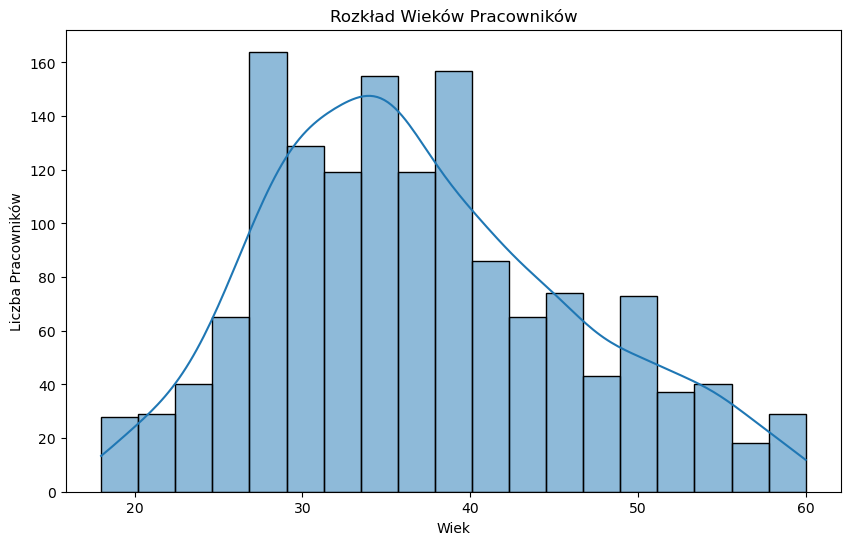

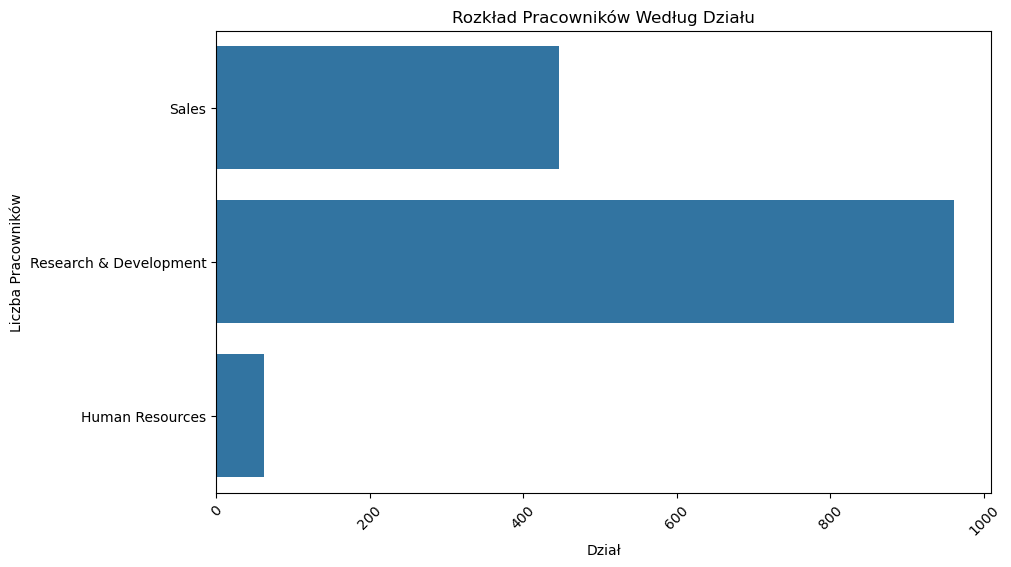

In [9]:
#Analiza Rozkładu Zmiennych

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych
data = pd.read_csv('C:/Users/Aleja/Desktop/HR_Analytics.csv')
# Rozkład wieku
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Rozkład Wieków Pracowników')
plt.xlabel('Wiek')
plt.ylabel('Liczba Pracowników')
plt.show()

# Rozkład w dziale
plt.figure(figsize=(10, 6))
sns.countplot(data['Department'])
plt.title('Rozkład Pracowników Według Działu')
plt.xlabel('Dział')
plt.ylabel('Liczba Pracowników')
plt.xticks(rotation=45)
plt.show()

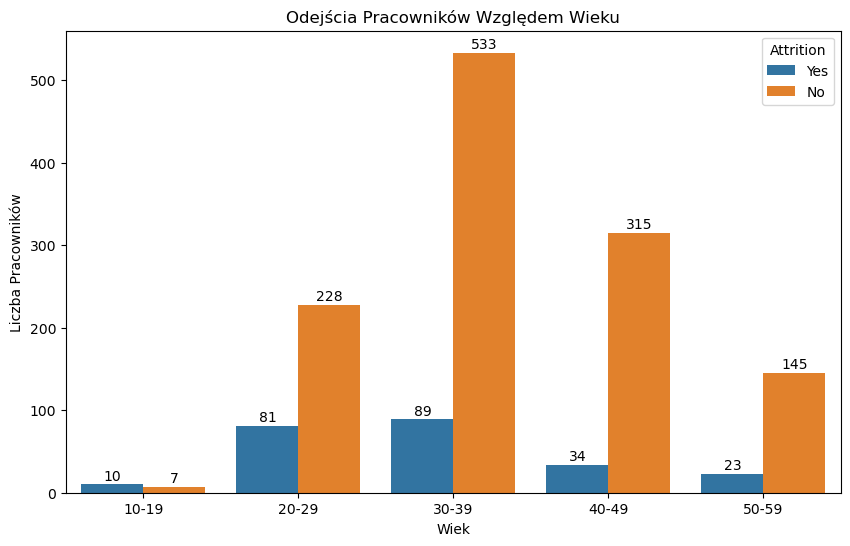

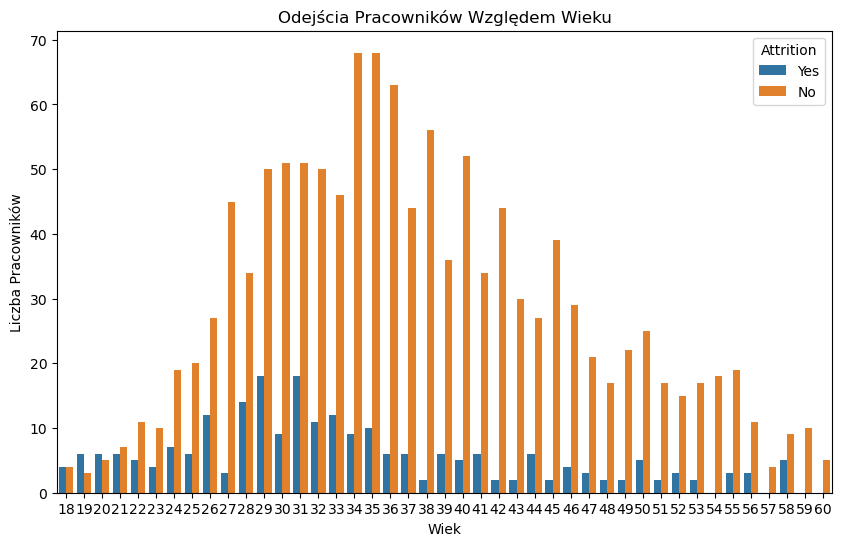

In [121]:
#2. Analiza Odejść Pracowników

# Analiza odejść pracowników względem wieku
data['AgeGroup'] = pd.cut(data['Age'], bins=range(9, 61, 10), labels=['10-19', '20-29', '30-39', '40-49', '50-59'])

# Analiza odejść pracowników względem wieku
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='AgeGroup', hue='Attrition', data=data)
plt.title('Odejścia Pracowników Względem Wieku')
plt.xlabel('Wiek')
plt.ylabel('Liczba Pracowników')

# Dodanie etykiet nad słupkami
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() + 10), ha='center', va='center')

plt.show()



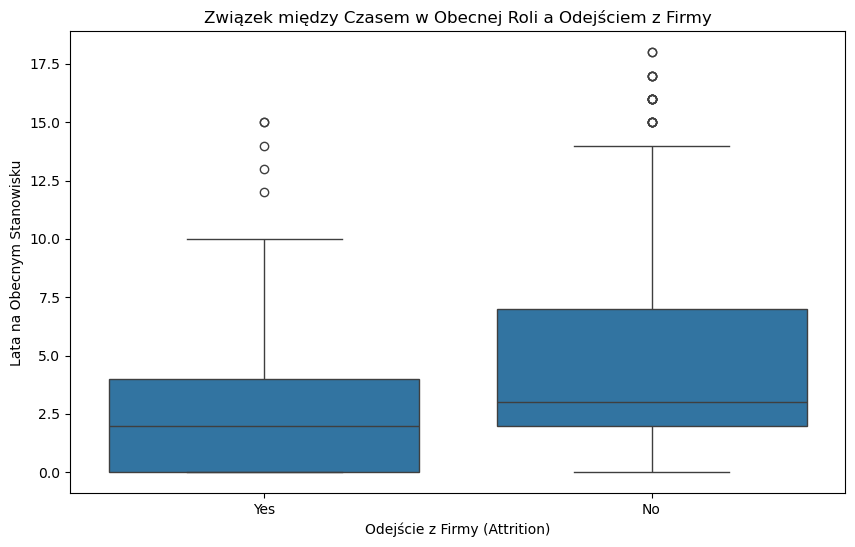

In [11]:
#3. Analiza Czasu bez Awansu

# Związek między czasem spędzonym na obecnym stanowisku a odejściem
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='YearsInCurrentRole', data=data)
plt.title('Związek między Czasem w Obecnej Roli a Odejściem z Firmy')
plt.xlabel('Odejście z Firmy (Attrition)')
plt.ylabel('Lata na Obecnym Stanowisku')
plt.show()

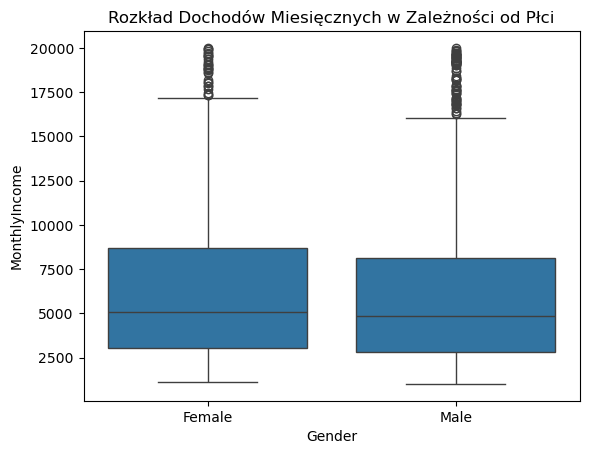

Test t-Studenta: t_stat = 1.2212617308870655, p_value = 0.22218303455087898


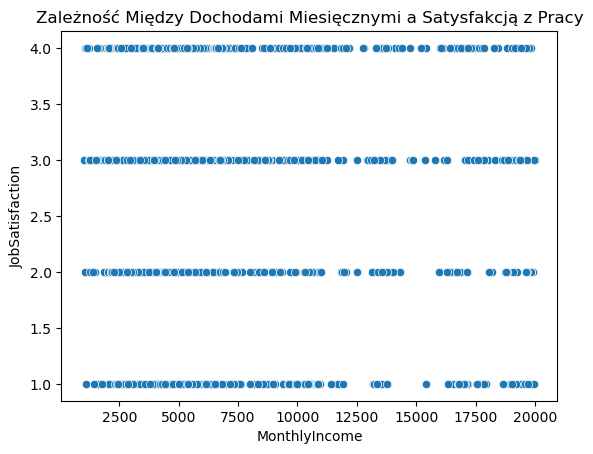

Korelacja Pearsona między dochodami a satysfakcją: -0.007156742355912677


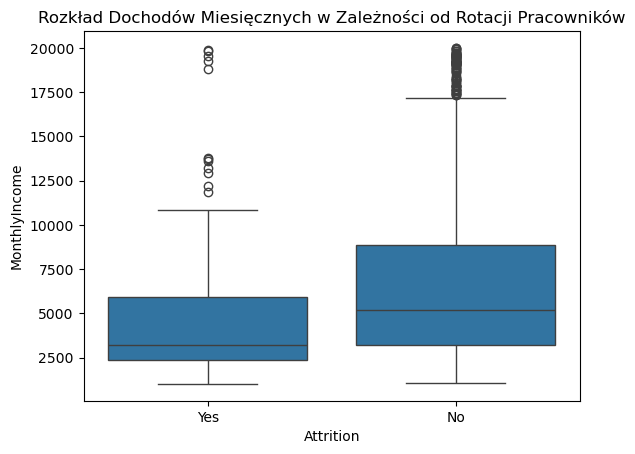

Test ANOVA dla dochodów a Attrition: F_stat = 38.488818983801764, p_value = 7.147363985353002e-10


In [12]:
# Teza o różnicach płacowych między płciami. Zbadanie, czy istnieje znacząca różnica w dochodach miesięcznych (MonthlyIncome) 
#między kobietami a mężczyznami i czy wpływa to na satysfakcję z pracy (JobSatisfaction) i rotację pracowników (Attrition)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

# Wczytanie danych
data = pd.read_csv('C:/Users/Aleja/Desktop/HR_Analytics.csv')

# Analiza płac między płciami
sns.boxplot(x='Gender', y='MonthlyIncome', data=data)
plt.title('Rozkład Dochodów Miesięcznych w Zależności od Płci')
plt.show()

# Test t-Studenta dla różnic w dochodach między płciami
female_income = data[data['Gender'] == 'Female']['MonthlyIncome']
male_income = data[data['Gender'] == 'Male']['MonthlyIncome']
t_stat, p_value = ttest_ind(female_income, male_income)
print(f'Test t-Studenta: t_stat = {t_stat}, p_value = {p_value}')

# Analiza zależności między dochodami a satysfakcją z pracy
sns.scatterplot(x='MonthlyIncome', y='JobSatisfaction', data=data)
plt.title('Zależność Między Dochodami Miesięcznymi a Satysfakcją z Pracy')
plt.show()

# Korelacja Pearsona między dochodami a satysfakcją
correlation_income_satisfaction = data['MonthlyIncome'].corr(data['JobSatisfaction'])
print(f'Korelacja Pearsona między dochodami a satysfakcją: {correlation_income_satisfaction}')

# Analiza zależności między dochodami a rotacją pracowników
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data)
plt.title('Rozkład Dochodów Miesięcznych w Zależności od Rotacji Pracowników')
plt.show()

# Test ANOVA dla różnic w dochodach między pracownikami z różnym Attrition
attrition_groups = [data[data['Attrition'] == 'Yes']['MonthlyIncome'],
                    data[data['Attrition'] == 'No']['MonthlyIncome']]
f_stat, p_value_attrition = f_oneway(*attrition_groups)
print(f'Test ANOVA dla dochodów a Attrition: F_stat = {f_stat}, p_value = {p_value_attrition}')


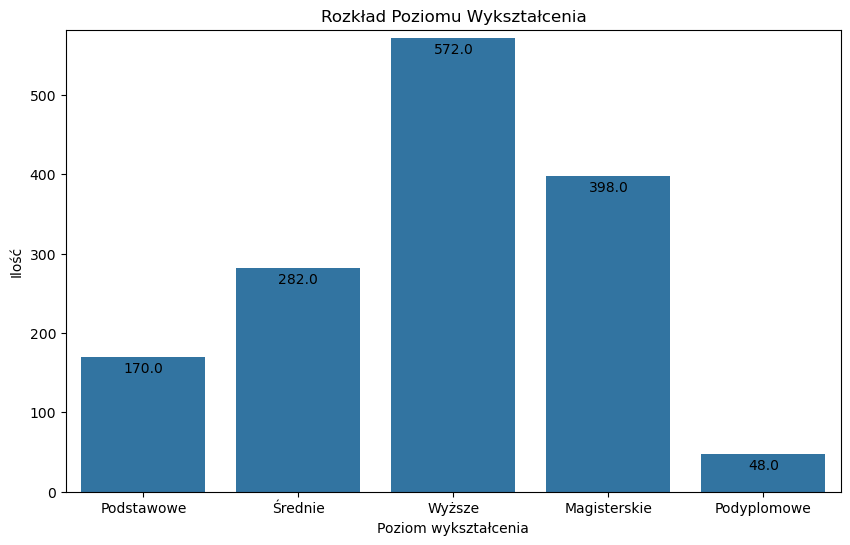

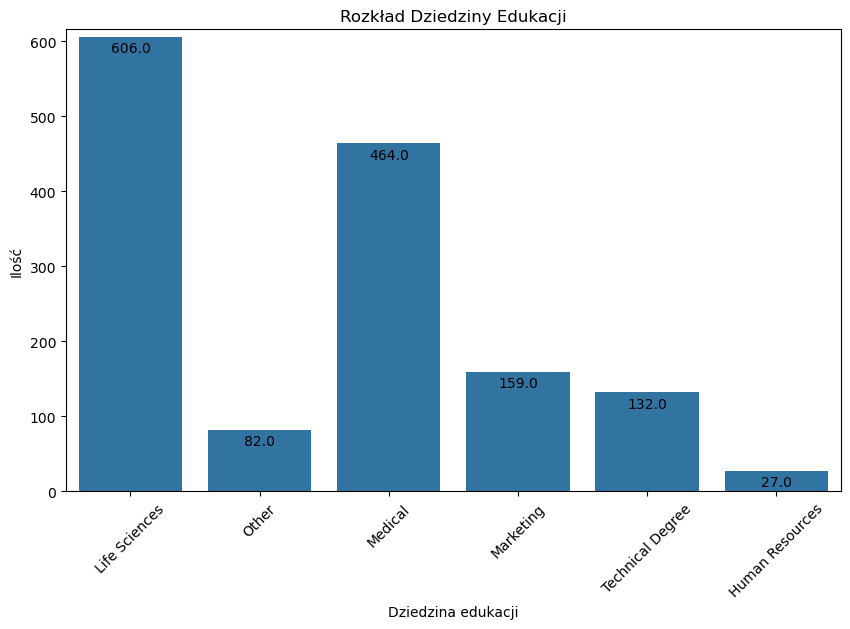

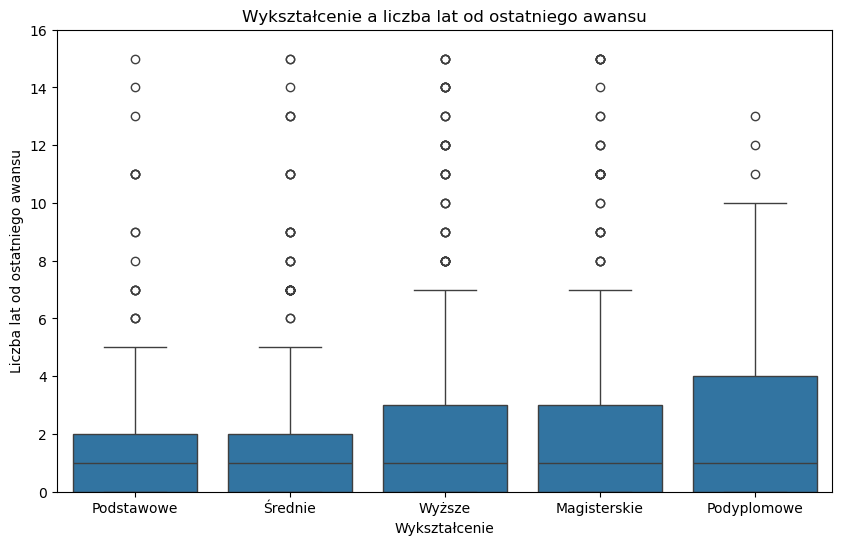

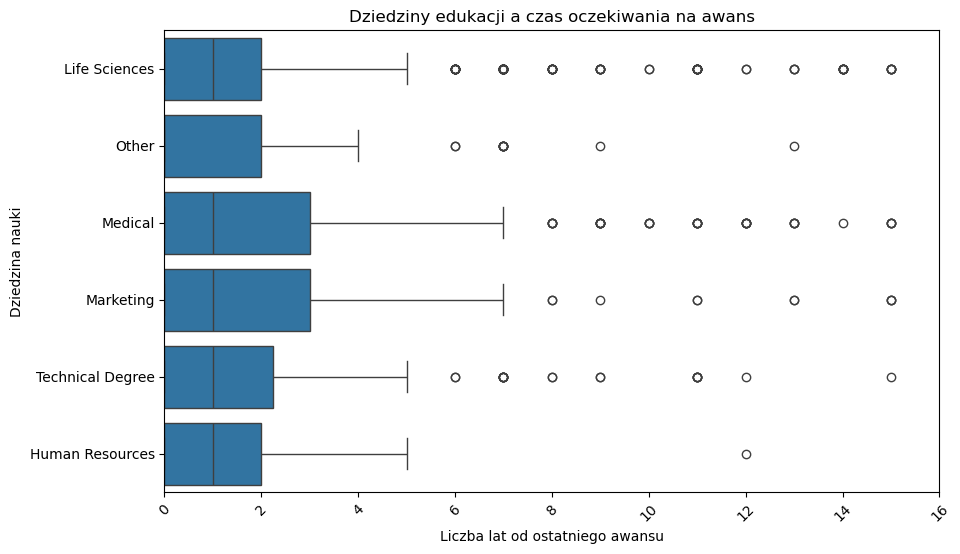

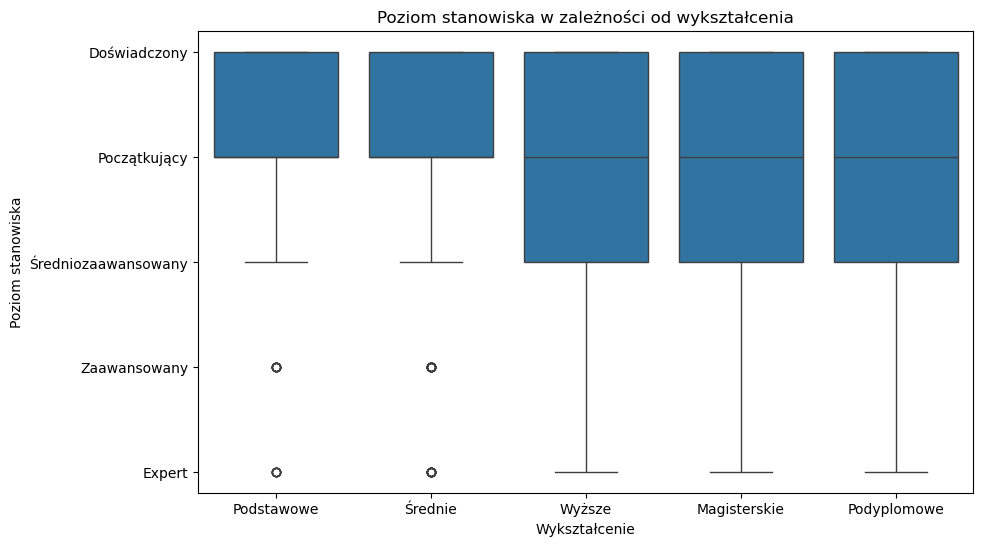

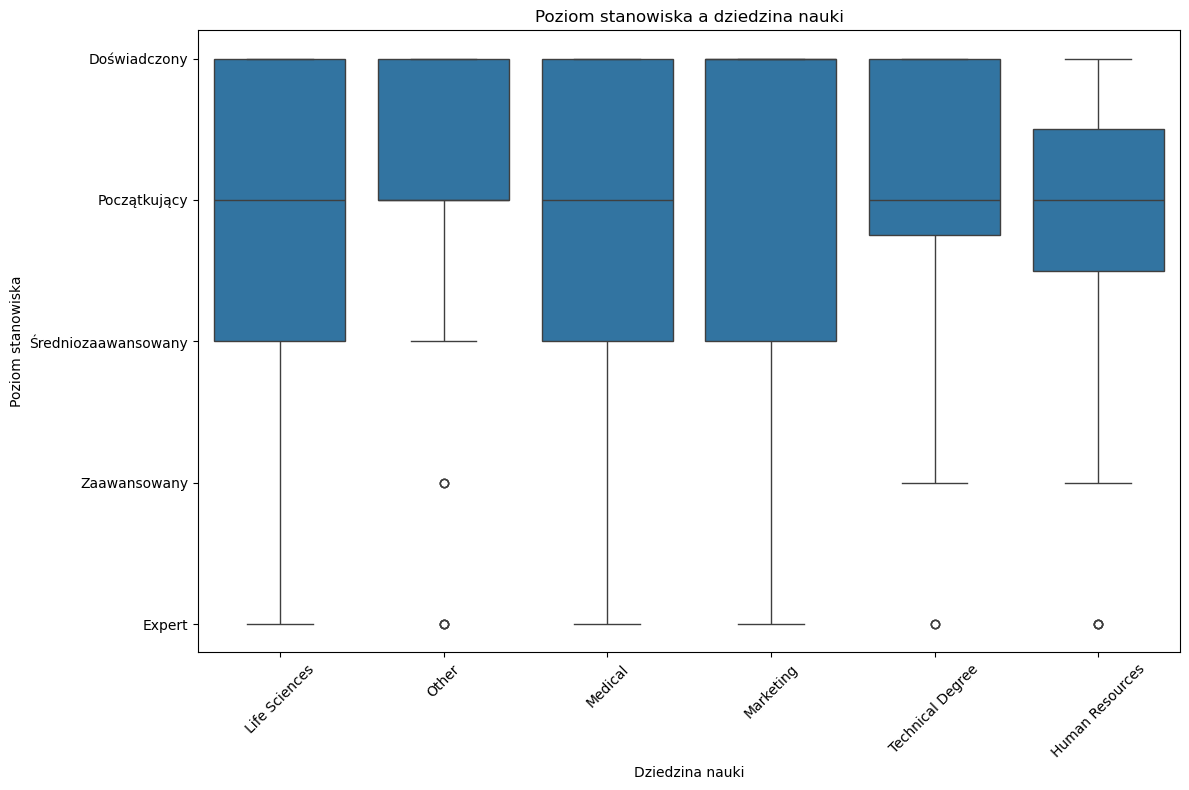

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Wczytanie danych
data = pd.read_csv('HR_Analytics.csv')  # Asumuję, że plik jest w obecnym katalogu

# Mapowanie numerów na poziomy edukacji
import matplotlib.pyplot as plt
import seaborn as sns

# 1 WYKRES!!!!!!!!!!!!!!!!!!!!!! Twój słownik z poziomami edukacji
education_levels = {
    1: 'Podstawowe',
    2: 'Średnie',
    3: 'Wyższe',
    4: 'Magisterskie',
    5: 'Podyplomowe'
    # ... Dodaj więcej, jeśli są inne poziomy
}

# Ustawienie porządku dla wykresów
education_order = ['Podstawowe', 'Średnie', 'Wyższe', 'Magisterskie', 'Podyplomowe']  # Upewnij się, że to odpowiada twojemu słownikowi

# Mapowanie poziomów edukacji w danych
data['Education'] = data['Education'].map(education_levels)

# Ustawienia dla wykresów
plt.rcParams['figure.figsize'] = (10, 6)  # Domyślny rozmiar dla wszystkich wykresów

# Analiza poziomu wykształcenia (z użyciem zmapowanych wartości)
ax = sns.countplot(x='Education', data=data, order=education_order)
plt.title('Rozkład Poziomu Wykształcenia')

# Dodanie etykiet nad słupkami
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() - 15), ha='center', va='center')
plt.ylabel('Ilość')
plt.xlabel('Poziom wykształcenia')
plt.ylim(0, data['Education'].value_counts().max() + 10)  # Dodanie marginesu do maksymalnej wartości
plt.show()

# 2 WYKRES!!!!!!!!!!!!!!!!!!!!!!Analiza dziedziny edukacji
plt.rcParams['figure.figsize'] = (10, 6)  # Domyślny rozmiar dla wszystkich wykresów

# Wykres dla rozkładu dziedziny edukacji
ax = sns.countplot(x='EducationField', data=data)
plt.title('Rozkład Dziedziny Edukacji')

# Obrót etykiet osi X
plt.xticks(rotation=45)

# Dodanie marginesu do maksymalnej wartości na osi Y
plt.ylim(0, data['EducationField'].value_counts().max() + 10)

# Dodanie etykiet nad słupkami
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() - 15), ha='center', va='center')

# Dodanie opisu osi Y
plt.ylabel('Ilość')
plt.xlabel('Dziedzina edukacji')
plt.show()

# WYKRES 3 Analiza wpływu wykształcenia na szybkość awansów
sns.boxplot(x='Education', y='YearsSinceLastPromotion', data=data, order=education_order)
plt.title('Wykształcenie a liczba lat od ostatniego awansu')
plt.ylim(0, data['YearsSinceLastPromotion'].max() + 1)  # Ustawienie zakresu dla osi Y
plt.ylabel('Liczba lat od ostatniego awansu')
plt.xlabel('Wykształcenie')
plt.show()

# WYKRES 4 !!!!!!!!!!!!!!!!Analiza wpływu dziedziny edukacji na szybkość awansów
plt.rcParams['figure.figsize'] = (10, 6)  # Domyślny rozmiar dla wszystkich wykresów
sns.boxplot(x='YearsSinceLastPromotion', y='EducationField', data=data)
plt.title('Dziedziny edukacji a czas oczekiwania na awans')
plt.xticks(rotation=45)

# Ustawienie zakresu dla osi X
plt.xlim(0, data['YearsSinceLastPromotion'].max() + 1)
plt.xlabel('Liczba lat od ostatniego awansu')
plt.ylabel('Dziedzina nauki')
plt.show()





# 5 WYKRES!!!!!!!!!!!!!!!!!!!!!! Analiza wpływu wykształcenia na poziom stanowiska

# Twój słownik z poziomami edukacji
job_levels = {
    1: 'Początkujący',
    2: 'Doświadczony',
    3: 'Średniozaawansowany',
    4: 'Zaawansowany',
    5: 'Expert'
    # ... Dodaj więcej, jeśli są inne poziomy
}

# Mapowanie poziomów stanowisk w danych
data['JobLevel'] = data['JobLevel'].map(job_levels)

# Ustawienia dla wykresów
plt.rcParams['figure.figsize'] = (10, 6)  # Domyślny rozmiar dla wszystkich wykresów

# Wykres pudełkowy dla poziomu stanowiska w zależności od wykształcenia
sns.boxplot(x='Education', y='JobLevel', data=data, order=education_order)
plt.title('Poziom stanowiska w zależności od wykształcenia')
plt.xlabel('Wykształcenie')
plt.ylabel('Poziom stanowiska')
plt.show()


# 6 WYKRES!!!!!!!!!!!!!!!!!Analiza wpływu dziedziny edukacji na poziom stanowiska


num_job_levels = len(data['JobLevel'].unique())

# Ustawienie większego rozmiaru obrazu
plt.figure(figsize=(12, 8))

# Plot for Education Field vs Job Level
sns.boxplot(x='EducationField', y='JobLevel', data=data)
plt.title('Poziom stanowiska a dziedzina nauki')
plt.xticks(rotation=45)
plt.xlabel('Dziedzina nauki')
plt.ylabel('Poziom stanowiska')
plt.tight_layout()  # This will adjust the padding to make use of the full figure size
plt.show()





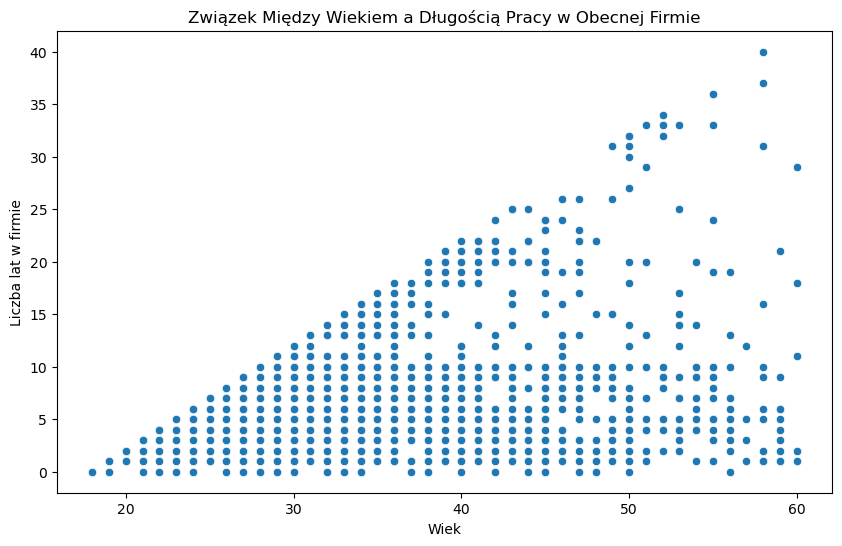

Korelacja Pearsona między wiekiem a długością pracy w obecnej firmie: 0.31130876974509863


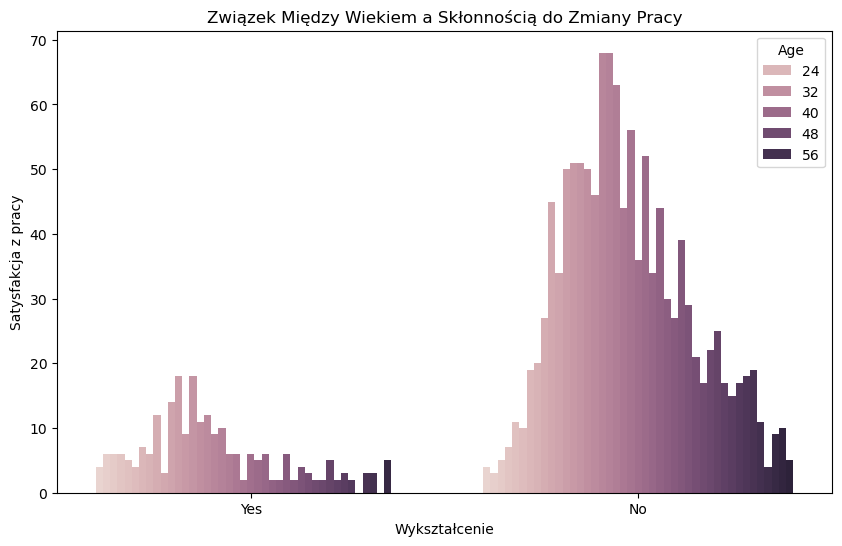

Test proporcji między Attrition a grupą wiekową: p_value = 7.354270742951739e-14


In [104]:
# Teza o związku między wiekiem a lojalnością wobec firmy. Badanie, czy wiek pracownika (Age) 
#koreluje z długością pracy w obecnej firmie (YearsAtCompany) i czy starsi pracownicy są mniej skłonni do zmiany pracy (Attrition).

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from statsmodels.stats.proportion import proportions_ztest

# Wczytanie danych
data = pd.read_csv('C:/Users/Aleja/Desktop/HR_Analytics.csv')

# Analiza związku między wiekiem a długością pracy w obecnej firmie
sns.scatterplot(x='Age', y='YearsAtCompany', data=data)
plt.title('Związek Między Wiekiem a Długością Pracy w Obecnej Firmie')
plt.xlabel('Wiek')
plt.ylabel('Liczba lat w firmie')
plt.show()

# Korelacja Pearsona między wiekiem a długością pracy w obecnej firmie
correlation_age_years_at_company, _ = pearsonr(data['Age'], data['YearsAtCompany'])
print(f'Korelacja Pearsona między wiekiem a długością pracy w obecnej firmie: {correlation_age_years_at_company}')

# Analiza związku między wiekiem a skłonnością do zmiany pracy (Attrition)
sns.countplot(x='Attrition', hue='Age', data=data)
plt.title('Związek Między Wiekiem a Skłonnością do Zmiany Pracy')
plt.xlabel('Wykształcenie')
plt.ylabel('Satysfakcja z pracy')
plt.show()

# Test proporcji związany z Attrition w różnych grupach wiekowych
# Dzielimy pracowników na dwie grupy: młodszych (<35 lat) i starszych (>=35 lat)
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 35, data['Age'].max()], labels=['Młodszy', 'Starszy'])
contingency_table = pd.crosstab(data['Attrition'], data['AgeGroup'])
p_value_age_attrition = proportions_ztest(contingency_table.iloc[1, :], contingency_table.sum(axis=1))[1]
print(f'Test proporcji między Attrition a grupą wiekową: p_value = {p_value_age_attrition}')



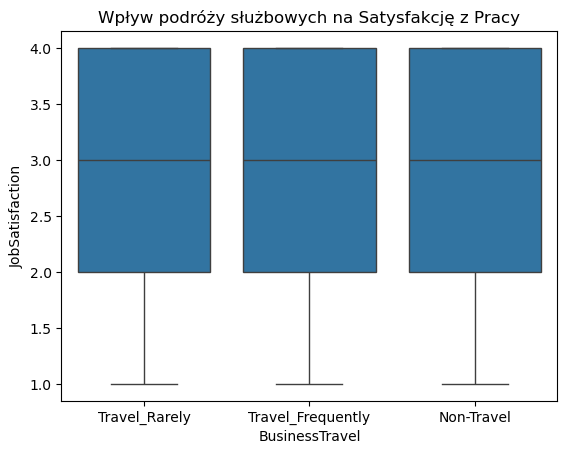

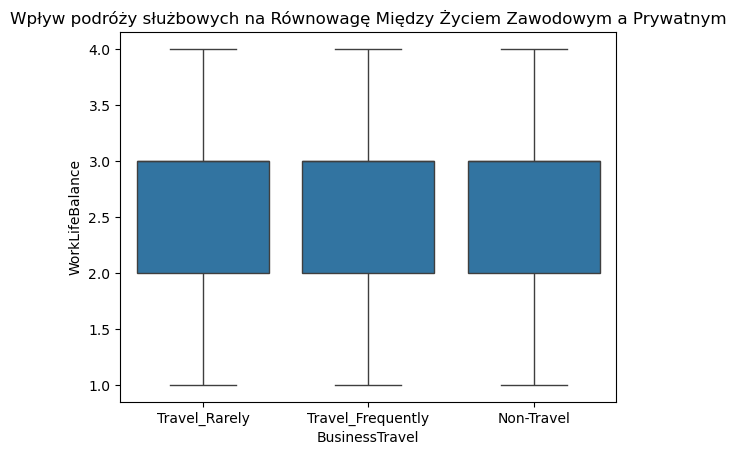

Test ANOVA dla satysfakcji z pracy a BusinessTravel: F_stat = 0.9821326689375073, p_value = 0.37475764819502955
Test ANOVA dla równowagi między życiem zawodowym a prywatnym a BusinessTravel: F_stat = 0.11798719311954148, p_value = 0.8887158665645974


In [15]:
# Teza o wpływie częstotliwości podróży służbowych na zadowolenie z pracy. Zbadanie, czy intensywność podróży służbowych (BusinessTravel) 
#ma wpływ na satysfakcję z pracy (JobSatisfaction) i równowagę między życiem zawodowym a prywatnym (WorkLifeBalance).

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Wczytanie danych
data = pd.read_csv('C:/Users/Aleja/Desktop/HR_Analytics.csv')

# Analiza wpływu podróży służbowych na satysfakcję z pracy
sns.boxplot(x='BusinessTravel', y='JobSatisfaction', data=data)
plt.title('Wpływ podróży służbowych na Satysfakcję z Pracy')
plt.show()

# Analiza wpływu podróży służbowych na równowagę między życiem zawodowym a prywatnym
sns.boxplot(x='BusinessTravel', y='WorkLifeBalance', data=data)
plt.title('Wpływ podróży służbowych na Równowagę Między Życiem Zawodowym a Prywatnym')
plt.show()

# Test ANOVA dla różnic w satysfakcji z pracy między grupami z różnym BusinessTravel
business_travel_groups_satisfaction = [data[data['BusinessTravel'] == level]['JobSatisfaction'] for level in data['BusinessTravel'].unique()]
f_stat_satisfaction, p_value_satisfaction = f_oneway(*business_travel_groups_satisfaction)
print(f'Test ANOVA dla satysfakcji z pracy a BusinessTravel: F_stat = {f_stat_satisfaction}, p_value = {p_value_satisfaction}')

# Test ANOVA dla różnic w równowadze między życiem zawodowym a prywatnym między grupami z różnym BusinessTravel
business_travel_groups_work_life_balance = [data[data['BusinessTravel'] == level]['WorkLifeBalance'] for level in data['BusinessTravel'].unique()]
f_stat_work_life_balance, p_value_work_life_balance = f_oneway(*business_travel_groups_work_life_balance)
print(f'Test ANOVA dla równowagi między życiem zawodowym a prywatnym a BusinessTravel: F_stat = {f_stat_work_life_balance}, p_value = {p_value_work_life_balance}')


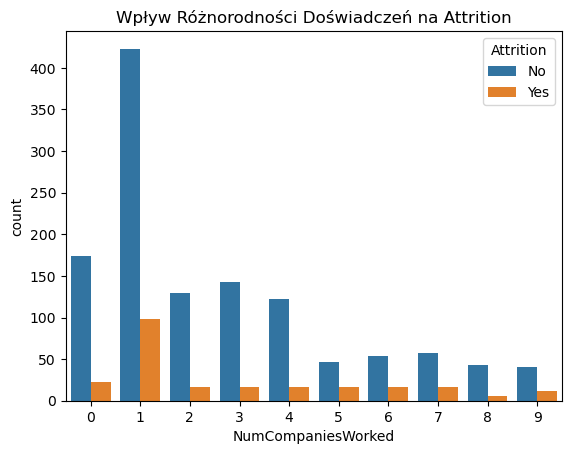

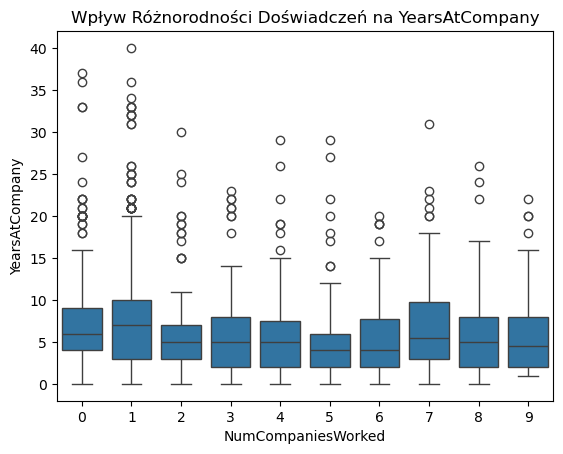

Test t-Studenta dla YearsAtCompany a NumCompaniesWorked: t_stat = -1.7159957346065882, p_value = 0.08670810267686914


In [16]:
# Teza o wpływie różnorodności doświadczeń zawodowych na stabilność zatrudnienia. Analiza, czy pracownicy, którzy pracowali w wielu 
#firmach (NumCompaniesWorked), różnią się pod względem lojalności wobec obecnej firmy (Attrition, YearsAtCompany).

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Wczytanie danych
data = pd.read_csv('C:/Users/Aleja/Desktop/HR_Analytics.csv')

# Analiza wpływu różnorodności doświadczeń na lojalność wobec obecnej firmy (Attrition)
sns.countplot(x='NumCompaniesWorked', hue='Attrition', data=data)
plt.title('Wpływ Różnorodności Doświadczeń na Attrition')
plt.show()

# Analiza wpływu różnorodności doświadczeń na długość zatrudnienia w obecnej firmie (YearsAtCompany)
sns.boxplot(x='NumCompaniesWorked', y='YearsAtCompany', data=data)
plt.title('Wpływ Różnorodności Doświadczeń na YearsAtCompany')
plt.show()

# Test t-Studenta dla różnic w długości zatrudnienia między grupami z różnym NumCompaniesWorked
num_companies_groups = [data[data['NumCompaniesWorked'] == i]['YearsAtCompany'].dropna() for i in data['NumCompaniesWorked'].unique()]
t_stat_years_at_company, p_value_years_at_company = ttest_ind(*num_companies_groups[:2])  # Użyj tylko dwóch grup
print(f'Test t-Studenta dla YearsAtCompany a NumCompaniesWorked: t_stat = {t_stat_years_at_company}, p_value = {p_value_years_at_company}')



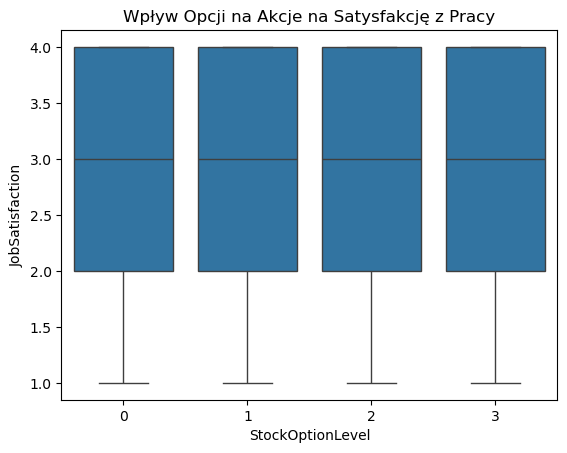

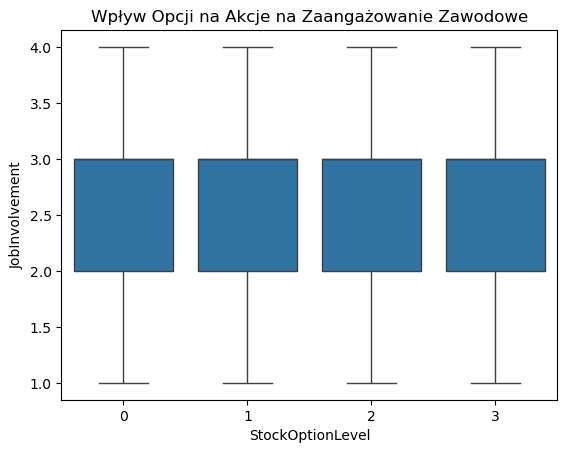

Korelacja Pearsona między opcjami na akcje a satysfakcją z pracy: 0.010690226120755882
Korelacja Pearsona między opcjami na akcje a zaangażowaniem zawodowym: 0.02152264037802397


In [17]:
#Teza o korelacji między zadowoleniem z pracy a opcjami na akcje.  Badanie, czy posiadanie opcji na akcje (StockOptionLevel) 
#wpływa na satysfakcję pracowników z pracy (JobSatisfaction) i ich zaangażowanie (JobInvolvement).

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Wczytanie danych
data = pd.read_csv('C:/Users/Aleja/Desktop/HR_Analytics.csv')

# Analiza wpływu opcji na akcje na satysfakcję z pracy
sns.boxplot(x='StockOptionLevel', y='JobSatisfaction', data=data)
plt.title('Wpływ Opcji na Akcje na Satysfakcję z Pracy')
plt.show()

# Analiza wpływu opcji na akcje na zaangażowanie zawodowe
sns.boxplot(x='StockOptionLevel', y='JobInvolvement', data=data)
plt.title('Wpływ Opcji na Akcje na Zaangażowanie Zawodowe')
plt.show()

# Korelacja Pearsona między opcjami na akcje a satysfakcją z pracy
correlation_stock_options_satisfaction, _ = pearsonr(data['StockOptionLevel'], data['JobSatisfaction'])
print(f'Korelacja Pearsona między opcjami na akcje a satysfakcją z pracy: {correlation_stock_options_satisfaction}')

# Korelacja Pearsona między opcjami na akcje a zaangażowaniem zawodowym
correlation_stock_options_involvement, _ = pearsonr(data['StockOptionLevel'], data['JobInvolvement'])
print(f'Korelacja Pearsona między opcjami na akcje a zaangażowaniem zawodowym: {correlation_stock_options_involvement}')


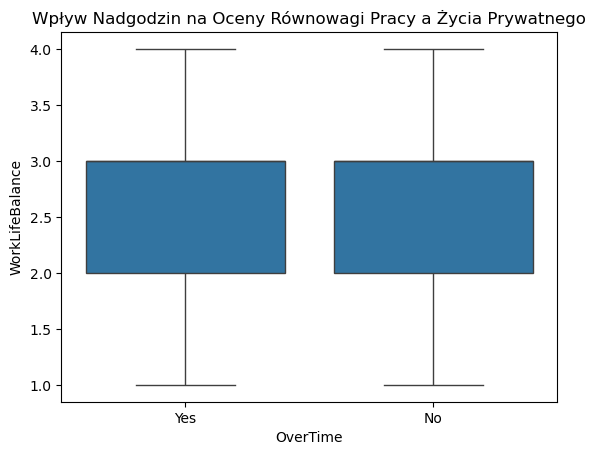

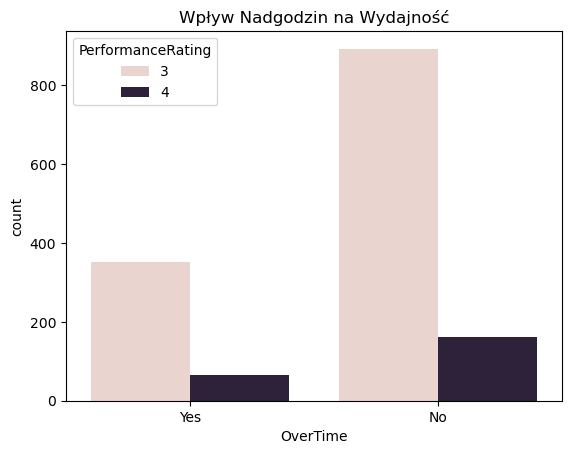

Test t-Studenta dla WorkLifeBalance a OverTime: t_stat = -1.0383926003108412, p_value = 0.2992583141167597
Test chi-kwadrat dla OverTime a PerformanceRating: p_value = 0.930471418406982


In [18]:
# Teza o wpływie nadgodzin na zdrowie i wydajność.  Analiza, czy pracownicy, którzy często wykonują nadgodziny (OverTime), 
#zgłaszają gorsze oceny równowagi między pracą a życiem prywatnym (WorkLifeBalance) oraz czy wpływa to na ich wydajność (PerformanceRating).
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

# Wczytanie danych
data = pd.read_csv('C:/Users/Aleja/Desktop/HR_Analytics.csv')

# Analiza wpływu nadgodzin na oceny równowagi między pracą a życiem prywatnym
sns.boxplot(x='OverTime', y='WorkLifeBalance', data=data)
plt.title('Wpływ Nadgodzin na Oceny Równowagi Pracy a Życia Prywatnego')
plt.show()

# Analiza wpływu nadgodzin na wydajność
sns.countplot(x='OverTime', hue='PerformanceRating', data=data)
plt.title('Wpływ Nadgodzin na Wydajność')
plt.show()

# Test t-Studenta dla różnic w ocenach równowagi między pracą a życiem prywatnym
overtime_groups = [data[data['OverTime'] == i]['WorkLifeBalance'].dropna() for i in data['OverTime'].unique()]
t_stat_work_life_balance, p_value_work_life_balance = ttest_ind(*overtime_groups)
print(f'Test t-Studenta dla WorkLifeBalance a OverTime: t_stat = {t_stat_work_life_balance}, p_value = {p_value_work_life_balance}')

# Test chi-kwadrat dla związku między nadgodzinami a wydajnością
contingency_table = pd.crosstab(data['OverTime'], data['PerformanceRating'])
chi2, p_value_overtime_performance, _, _ = chi2_contingency(contingency_table)
print(f'Test chi-kwadrat dla OverTime a PerformanceRating: p_value = {p_value_overtime_performance}')





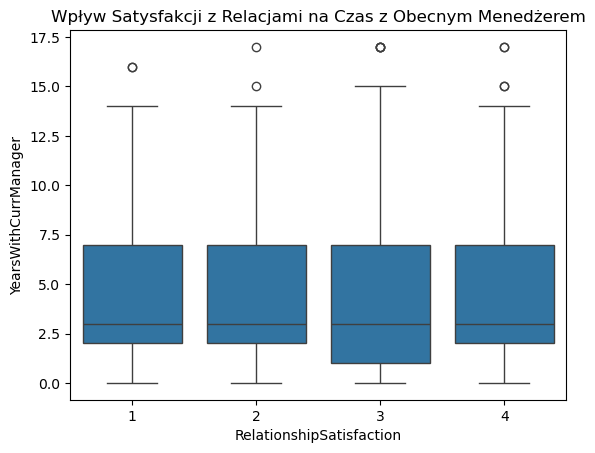

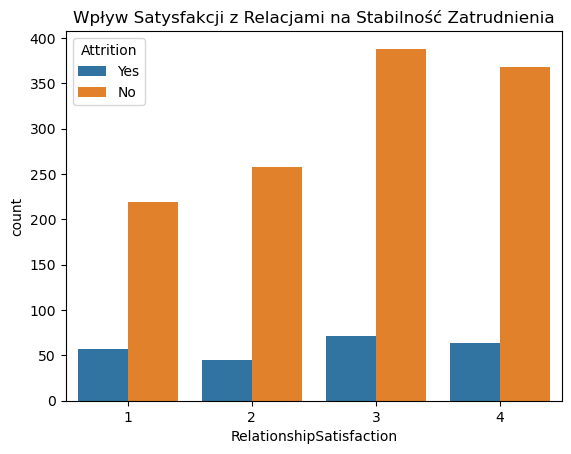

Test t-Studenta dla YearsWithCurrManager a RelationshipSatisfaction: t_stat = 0.2722246715042827, p_value = 0.7855288661345777
Test chi-kwadrat dla RelationshipSatisfaction a Attrition: p_value = 0.15497244371052638


In [19]:
#Teza o wpływie satysfakcji związanej z relacjami w pracy na długotrwałość zatrudnienia. 
#Sprawdzenie, czy zadowolenie z relacji między pracownikami (RelationshipSatisfaction) 
#ma wpływ na czas spędzony z obecnym menedżerem (YearsWithCurrManager) i stabilność zatrudnienia.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

# Wczytanie danych
data = pd.read_csv('C:/Users/Aleja/Desktop/HR_Analytics.csv')

# Analiza wpływu satysfakcji związanej z relacjami w pracy na czas spędzony z obecnym menedżerem
sns.boxplot(x='RelationshipSatisfaction', y='YearsWithCurrManager', data=data)
plt.title('Wpływ Satysfakcji z Relacjami na Czas z Obecnym Menedżerem')
plt.show()

# Analiza wpływu satysfakcji związanej z relacjami w pracy na stabilność zatrudnienia
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=data)
plt.title('Wpływ Satysfakcji z Relacjami na Stabilność Zatrudnienia')
plt.show()

# Test t-Studenta dla różnic w czasie spędzonym z obecnym menedżerem
relationship_satisfaction_groups = [data[data['RelationshipSatisfaction'] == i]['YearsWithCurrManager'].dropna() for i in data['RelationshipSatisfaction'].unique()]
t_stat_years_with_curr_manager, p_value_years_with_curr_manager = ttest_ind(relationship_satisfaction_groups[0], relationship_satisfaction_groups[1])
print(f'Test t-Studenta dla YearsWithCurrManager a RelationshipSatisfaction: t_stat = {t_stat_years_with_curr_manager}, p_value = {p_value_years_with_curr_manager}')

# Test chi-kwadrat dla związku między satysfakcją z relacji a stabilnością zatrudnienia
contingency_table = pd.crosstab(data['RelationshipSatisfaction'], data['Attrition'])
chi2, p_value_relationship_attrition, _, _ = chi2_contingency(contingency_table)
print(f'Test chi-kwadrat dla RelationshipSatisfaction a Attrition: p_value = {p_value_relationship_attrition}')



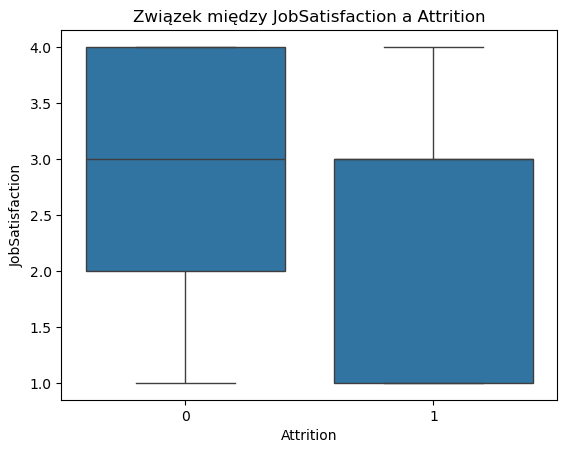

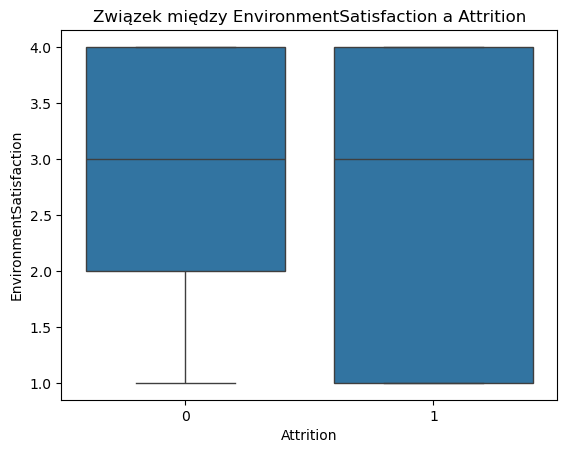

Test punktbiserialny między JobSatisfaction a Attrition: correlation = -0.10348112606902145, p_value = 7.043066741731186e-05
Test punktbiserialny między EnvironmentSatisfaction a Attrition: correlation = -0.1033689783379361, p_value = 7.172338549368838e-05


In [20]:
# Teza o związku satysfakcji z pracy z rotacją pracowników (attrition). 
#Można zbadać, czy niższy poziom satysfakcji z pracy (JobSatisfaction) lub środowiska pracy (EnvironmentSatisfaction) 
#koreluje z większym prawdopodobieństwem odejścia pracownika (Attrition).

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

# Wczytanie danych
data = pd.read_csv('C:/Users/Aleja/Desktop/HR_Analytics.csv')

# Mapowanie 'Yes' i 'No' na 1 i 0 w kolumnie 'Attrition'
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Analiza związku między JobSatisfaction a Attrition
sns.boxplot(x='Attrition', y='JobSatisfaction', data=data)
plt.title('Związek między JobSatisfaction a Attrition')
plt.show()

# Analiza związku między EnvironmentSatisfaction a Attrition
sns.boxplot(x='Attrition', y='EnvironmentSatisfaction', data=data)
plt.title('Związek między EnvironmentSatisfaction a Attrition')
plt.show()

# Test punktbiserialny między JobSatisfaction a Attrition
correlation_job_satisfaction_attrition, p_value_job_satisfaction_attrition = pointbiserialr(data['JobSatisfaction'], data['Attrition'])
print(f'Test punktbiserialny między JobSatisfaction a Attrition: correlation = {correlation_job_satisfaction_attrition}, p_value = {p_value_job_satisfaction_attrition}')

# Test punktbiserialny między EnvironmentSatisfaction a Attrition
correlation_environment_satisfaction_attrition, p_value_environment_satisfaction_attrition = pointbiserialr(data['EnvironmentSatisfaction'], data['Attrition'])
print(f'Test punktbiserialny między EnvironmentSatisfaction a Attrition: correlation = {correlation_environment_satisfaction_attrition}, p_value = {p_value_environment_satisfaction_attrition}')


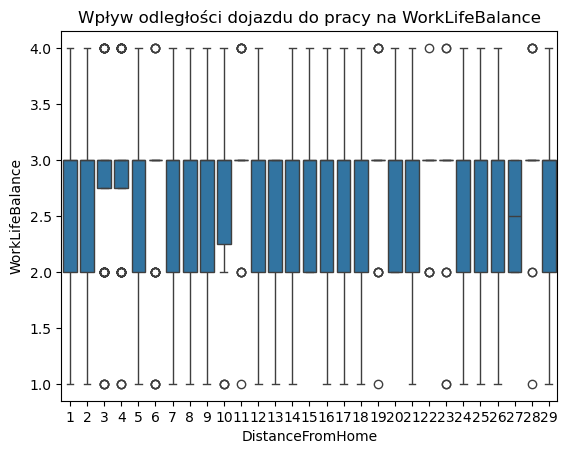

Test t-Studenta dla WorkLifeBalance a DistanceFromHome: t_stat = 1.0440158145240643, p_value = 0.29664995918895537


In [21]:
#Teza dotycząca wpływu czasu dojazdu do pracy na równowagę życia zawodowego i prywatnego. Sprawdzenie, czy większa odległość od domu 
#(DistanceFromHome) wpływa negatywnie na równowagę między życiem zawodowym a prywatnym (WorkLifeBalance).

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Wczytanie danych
data = pd.read_csv('C:/Users/Aleja/Desktop/HR_Analytics.csv')

# Analiza wpływu odległości dojazdu do pracy na równowagę między życiem zawodowym a prywatnym
sns.boxplot(x='DistanceFromHome', y='WorkLifeBalance', data=data)
plt.title('Wpływ odległości dojazdu do pracy na WorkLifeBalance')
plt.show()

# Podział danych na dwie grupy: blisko pracy (DistanceFromHome <= 10) i daleko od pracy (DistanceFromHome > 10)
near_home = data[data['DistanceFromHome'] <= 10]['WorkLifeBalance']
far_from_home = data[data['DistanceFromHome'] > 10]['WorkLifeBalance']

# Test t-Studenta dla porównania równowagi między życiem zawodowym a prywatnym między grupami
t_stat, p_value = ttest_ind(near_home, far_from_home, nan_policy='omit')

# Wyświetlenie wyników
print(f'Test t-Studenta dla WorkLifeBalance a DistanceFromHome: t_stat = {t_stat}, p_value = {p_value}')



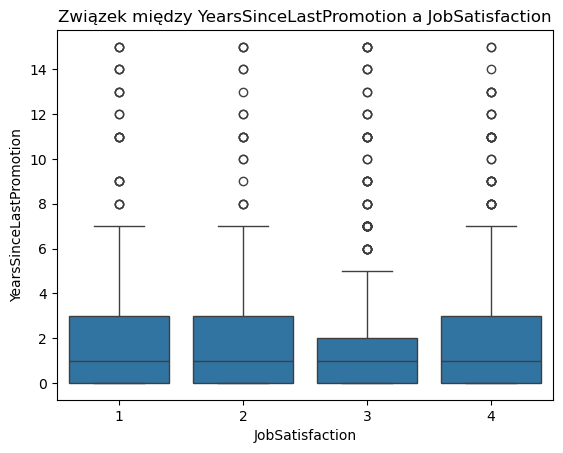

Test t-Studenta dla JobSatisfaction a YearsSinceLastPromotion: t_stat = 0.49811641457945555, p_value = 0.6184766050569503



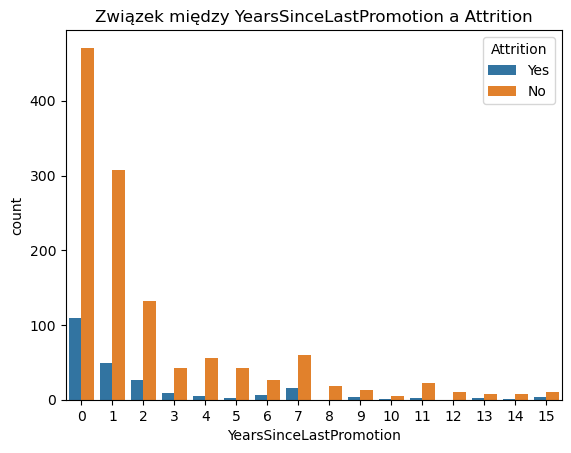

Test chi-kwadrat dla Attrition a YearsSinceLastPromotion: p_value = 0.021660414292025823



In [22]:
# Teza o wpływie możliwości awansu na zadowolenie z pracy.  Analiza, czy brak awansu przez dłuższy czas 
#(YearsSinceLastPromotion) ma wpływ na satysfakcję z pracy (JobSatisfaction) i ogólną rotację pracowników (Attrition).

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

# Wczytanie danych
data = pd.read_csv('C:/Users/Aleja/Desktop/HR_Analytics.csv')

# Analiza związku między YearsSinceLastPromotion a JobSatisfaction
sns.boxplot(x='JobSatisfaction', y='YearsSinceLastPromotion', data=data)
plt.title('Związek między YearsSinceLastPromotion a JobSatisfaction')
plt.show()

# Test t-Studenta dla różnic w JobSatisfaction między grupą z awansem a grupą bez awansu
promotion_groups = [data[data['YearsSinceLastPromotion'] > 0]['JobSatisfaction'],
                    data[data['YearsSinceLastPromotion'] == 0]['JobSatisfaction']]
t_stat_job_satisfaction, p_value_job_satisfaction = ttest_ind(*promotion_groups)
print(f'Test t-Studenta dla JobSatisfaction a YearsSinceLastPromotion: t_stat = {t_stat_job_satisfaction}, p_value = {p_value_job_satisfaction}\n')

# Analiza związku między YearsSinceLastPromotion a Attrition
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=data)
plt.title('Związek między YearsSinceLastPromotion a Attrition')
plt.show()

# Test chi-kwadrat dla związku między YearsSinceLastPromotion a Attrition
contingency_table_promotion_attrition = pd.crosstab(data['YearsSinceLastPromotion'] > 0, data['Attrition'])
_, p_value_promotion_attrition, _, _ = chi2_contingency(contingency_table_promotion_attrition)
print(f'Test chi-kwadrat dla Attrition a YearsSinceLastPromotion: p_value = {p_value_promotion_attrition}\n')



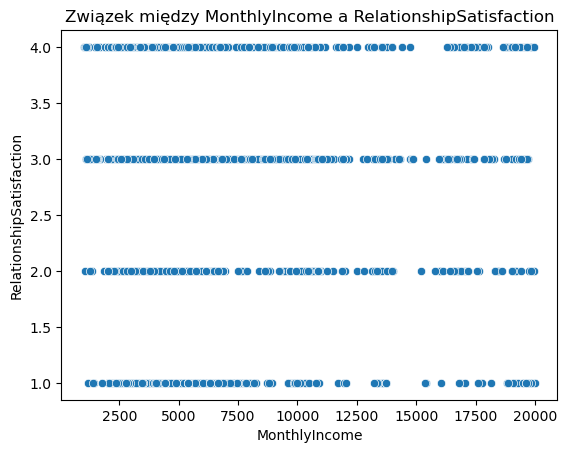

Korelacja Pearsona między MonthlyIncome a RelationshipSatisfaction: 0.02587343613755757, p_value = 0.32152710376878973



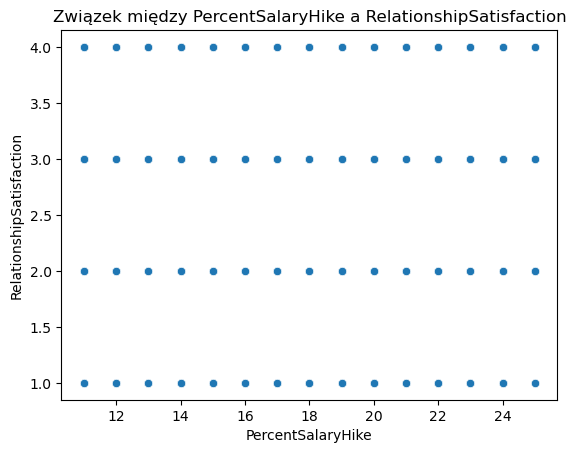

Korelacja Pearsona między PercentSalaryHike a RelationshipSatisfaction: -0.04049008105707735, p_value = 0.12072710669196711



In [23]:
#Teza o związku pomiędzy wynagrodzeniem a zadowoleniem z relacji zawodowych.  
#Zbadanie korelacji między wynagrodzeniem (MonthlyIncome, PercentSalaryHike) a zadowoleniem z relacji w pracy (RelationshipSatisfaction).

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Wczytanie danych
data = pd.read_csv('C:/Users/Aleja/Desktop/HR_Analytics.csv')

# Analiza związku między MonthlyIncome a RelationshipSatisfaction
sns.scatterplot(x='MonthlyIncome', y='RelationshipSatisfaction', data=data)
plt.title('Związek między MonthlyIncome a RelationshipSatisfaction')
plt.show()

# Korelacja Pearsona między MonthlyIncome a RelationshipSatisfaction
correlation_income_relationship, p_value_income_relationship = pearsonr(data['MonthlyIncome'], data['RelationshipSatisfaction'])
print(f'Korelacja Pearsona między MonthlyIncome a RelationshipSatisfaction: {correlation_income_relationship}, p_value = {p_value_income_relationship}\n')

# Analiza związku między PercentSalaryHike a RelationshipSatisfaction
sns.scatterplot(x='PercentSalaryHike', y='RelationshipSatisfaction', data=data)
plt.title('Związek między PercentSalaryHike a RelationshipSatisfaction')
plt.show()

# Korelacja Pearsona między PercentSalaryHike a RelationshipSatisfaction
correlation_salary_hike_relationship, p_value_salary_hike_relationship = pearsonr(data['PercentSalaryHike'], data['RelationshipSatisfaction'])
print(f'Korelacja Pearsona między PercentSalaryHike a RelationshipSatisfaction: {correlation_salary_hike_relationship}, p_value = {p_value_salary_hike_relationship}\n')



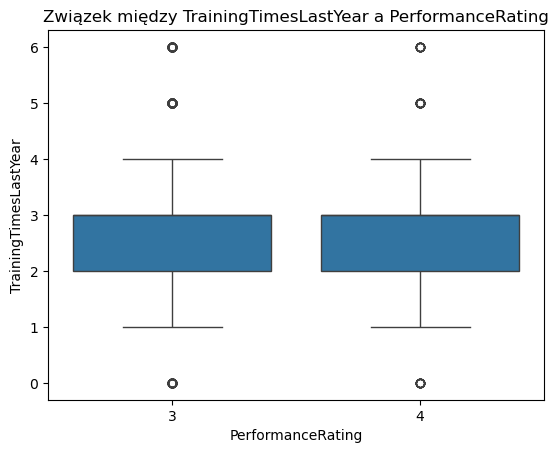

Test ANOVA dla TrainingTimesLastYear a PerformanceRating: F_stat = 0.30858911559004226, p_value = 0.9327185567580716



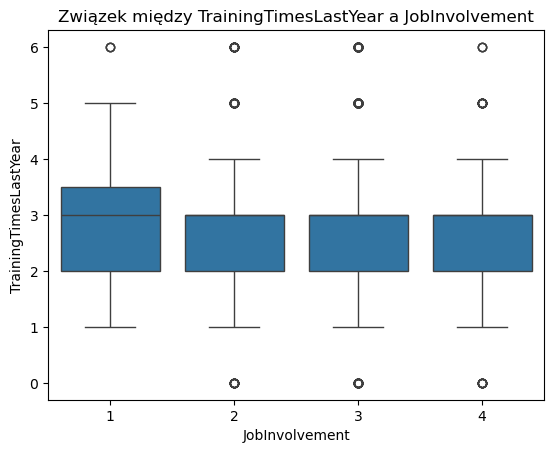

Test ANOVA dla TrainingTimesLastYear a JobInvolvement: F_stat = 1.2624763606315756, p_value = 0.2716832405552108



In [24]:
#Teza dotycząca wpływu szkoleń na wydajność i zaangażowanie w pracę.  
#Sprawdzenie, czy liczba szkoleń (TrainingTimesLastYear) wpływa na ocenę wydajności (PerformanceRating) i poziom zaangażowania w pracę 
#(JobInvolvement).

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

# Wczytanie danych
data = pd.read_csv('C:/Users/Aleja/Desktop/HR_Analytics.csv')

# Analiza związku między TrainingTimesLastYear a PerformanceRating
sns.boxplot(x='PerformanceRating', y='TrainingTimesLastYear', data=data)
plt.title('Związek między TrainingTimesLastYear a PerformanceRating')
plt.show()

# Test ANOVA dla związku między TrainingTimesLastYear a PerformanceRating
f_stat_training_performance, p_value_training_performance = f_oneway(*[data[data['TrainingTimesLastYear'] == i]['PerformanceRating'] for i in data['TrainingTimesLastYear'].unique()])
print(f'Test ANOVA dla TrainingTimesLastYear a PerformanceRating: F_stat = {f_stat_training_performance}, p_value = {p_value_training_performance}\n')

# Analiza związku między TrainingTimesLastYear a JobInvolvement
sns.boxplot(x='JobInvolvement', y='TrainingTimesLastYear', data=data)
plt.title('Związek między TrainingTimesLastYear a JobInvolvement')
plt.show()

# Test ANOVA dla związku między TrainingTimesLastYear a JobInvolvement
f_stat_training_involvement, p_value_training_involvement = f_oneway(*[data[data['TrainingTimesLastYear'] == i]['JobInvolvement'] for i in data['TrainingTimesLastYear'].unique()])
print(f'Test ANOVA dla TrainingTimesLastYear a JobInvolvement: F_stat = {f_stat_training_involvement}, p_value = {p_value_training_involvement}\n')


In [25]:
#Teza o wpływie długoterminowego zatrudnienia bez awansu na zadowolenie z pracy.  
#Przeanalizowanie wpływu długiego okresu pracy na tym samym stanowisku (YearsInCurrentRole) bez awansu na zadowolenie z pracy (JobSatisfaction) 
#i decyzję o odejściu (Attrition).

import pandas as pd
from scipy.stats import chi2_contingency

# Wczytanie danych
data = pd.read_csv('C:/Users/Aleja/Desktop/HR_Analytics.csv')

# Korelacja Pearsona między wiekiem a długością pracy w obecnej firmie
correlation_age_years_at_company = data[['Age', 'YearsAtCompany']].corr().iloc[0, 1]
print(f'Korelacja Pearsona między wiekiem a długością pracy w obecnej firmie: {correlation_age_years_at_company}\n')

# Test chi-kwadrat dla związku między YearsInCurrentRole a Attrition
contingency_table_years_role_attrition = pd.crosstab(data['YearsInCurrentRole'] > 0, data['Attrition'])
_, p_value_years_role_attrition, _, _ = chi2_contingency(contingency_table_years_role_attrition)
print(f'Test chi-kwadrat dla YearsInCurrentRole a Attrition: p_value = {p_value_years_role_attrition}\n')

# Twoje pozostałe analizy...



Korelacja Pearsona między wiekiem a długością pracy w obecnej firmie: 0.3113087697450989

Test chi-kwadrat dla YearsInCurrentRole a Attrition: p_value = 2.592668836152837e-10



In [5]:
#Teza o wpływie nadgodzin na rotację pracowników.  Badanie, czy pracownicy często pracujący po godzinach 
#(OverTime) są bardziej skłonni do zmiany pracy (Attrition).

import pandas as pd
from scipy.stats import chi2_contingency

# Wczytanie danych
data = pd.read_csv('/home/marcinbrysiak/ProjektHR/HR_Analytics.csv')

# Test chi-kwadrat dla związku między OverTime a Attrition
contingency_table_overtime_attrition = pd.crosstab(data['OverTime'], data['Attrition'])
_, p_value_overtime_attrition, _, _ = chi2_contingency(contingency_table_overtime_attrition)
print(f'Test chi-kwadrat dla OverTime a Attrition: p_value = {p_value_overtime_attrition}\n')



Test chi-kwadrat dla OverTime a Attrition: p_value = 8.15842372153832e-21

